In [1]:
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import ipywidgets as wdg
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 
from keras.utils import normalize
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten,BatchNormalization

In [2]:
tumor = []
no_tumor = []
for file in glob.iglob('C:/Users/hp/Desktop/Deep Learning/TensorFlow/Brain Tumor Classification/dataset/yes/*'):
    img = cv2.imread(file)                      
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, (150, 150)) 
    tumor.append((img, 1))


for file in glob.iglob('C:/Users/hp/Desktop/Deep Learning/TensorFlow/Brain Tumor Classification/dataset/no/*'):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150)) 
    no_tumor.append((img, 0))


data = tumor + no_tumor


x = np.array([i[0] for i in data]) 
y = np.array([i[1] for i in data])  


In [3]:
def plot_img(i):
    plt.figure(figsize=(8,8))
    plt.imshow(x[i])
    if y[i]==1:
        plt.title('Tumorous')
    if y[i]==0:
        plt.title('Not_Tumorous')

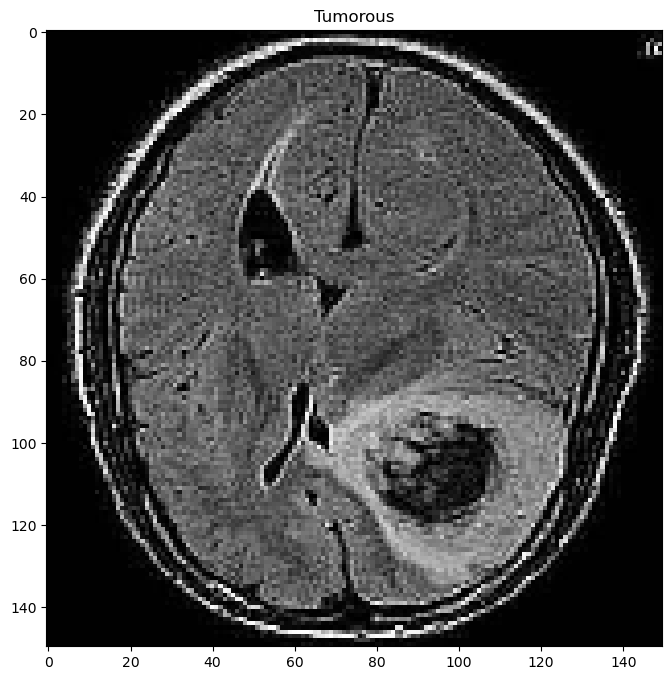

In [4]:
plot_img(30) 

In [5]:
x,y=shuffle(x,y,random_state=42)

In [6]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=.18,random_state=42,stratify=y)

In [7]:
len(x_train)
print(len(y_train))

2460


In [8]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [9]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),kernel_initializer='he_uniform', input_shape=(150,150,3),activation='relu'),
    keras.layers.Conv2D(32,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(64,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),

 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid'),
])

C:\Users\hp\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 146, 146, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 71, 71, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 33, 33, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,52

 Total params: 5,582,305 (21.29 MB)

 Trainable params: 5,579,297 (21.28 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.2)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)